In [24]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [25]:
def L2knnclassifier(xtrain, ytrain, xtest, k):
    
    dist = np.square(xtrain-xtest)
    inn = np.argpartition(dist, kth=k,)[:k]
    vote, count = np.unique(ytrain[inn], return_counts=True)
    ytest = np.mean(vote)
    return ytest

In [26]:
def L1knnclassifier(xtrain, ytrain, xtest, k):

    dist = abs(xtrain-xtest)
    inn = np.argpartition(dist, kth=k)[:k]
    vote, count = np.unique(ytrain[inn], return_counts=True)
    ytest = np.mean(vote)
    return ytest

In [27]:
def RMSE(trueVal, predictedVal): 
    return np.sqrt(((trueVal - predictedVal) ** 2).mean())

In [28]:
def kCrossFold(xtrain,j,k=5):
    
    length = np.shape(xtrain)[0]
    foldSize = int(length/k)
    folds = []
    for i in range (0,k):
        if i != j:
            folds.extend(xtrain[i*foldSize: foldSize*(i+1)])
        else:
            val = xtrain[i*foldSize: foldSize*(i+1)]

    return np.array(folds), np.array(val)


In [29]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mauna_loa')


x_train = np.append(x_train,x_valid)
y_train = np.append(y_train,y_valid)


np.random.seed(1)
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]


#error variables

l2error = []
l1error = []

kvalues = list(range(0, 40))
l1error = np.zeros(len(kvalues))
l2error = np.zeros(len(kvalues))




#Do Cross validation on Dataset

foldLength = int(x_train.shape[0]/5)

for split in range(5):
    
    xtrain, xval = kCrossFold(x_train,split)
    ytrain, yval = kCrossFold(y_train,split)
    
    
    
#     print('xtrain',np.shape(xtrain))
#     print('xval',np.shape(xval))
#     print('ytrain',np.shape(ytrain))
#     print('yval',np.shape(yval))

    for k in range(len(kvalues)):
        
        y_predictedL1 = []
        y_predictedL2 = []
        
#         print(xval.shape[0])
        for i in range(0,xval.shape[0]):
                    
            y_predictedL2.append(L2knnclassifier(xtrain, ytrain, xval[i], kvalues[k]))
            y_predictedL1.append(L1knnclassifier(xtrain, ytrain, xval[i], kvalues[k]))
                
#             print(yval.shape[0])
#             print(y_predictedL2)

        l2error[k] += RMSE(yval, y_predictedL2)
        l1error[k] += RMSE(yval, y_predictedL1)


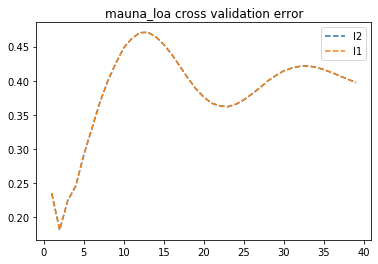

In [30]:
plt.plot(kvalues,l2error, '--', kvalues, l1error,'--')
plt.legend(['l2', 'l1'])
plt.title('mauna_loa cross validation error')
plt.show()



In [52]:
k = 2
    
testPredicted = []
        
for i in range(0,x_train.shape[0]):
                    
    testPredicted.append(L2knnclassifier(x_train, y_train, x_train[i], k))                

l2error = RMSE(y_test, testPredicted)

print(l2error)

2.138981579370823


Text(0.5, 1.0, 'mauna_loa Data Set with training prediction')

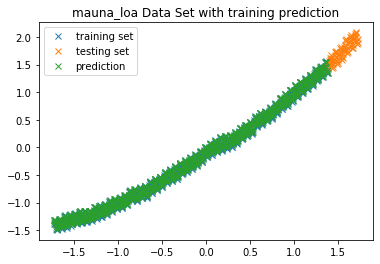

In [53]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_train,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with training prediction')


In [50]:
k = 2
    
testPredicted = []
        
for i in range(0,x_test.shape[0]):
                    
    testPredicted.append(L2knnclassifier(x_train, y_train, x_test[i], k))                

l2error = RMSE(y_test, testPredicted)

print(l2error)

0.4407048903546393


Text(0.5, 1.0, 'mauna_loa Data Set with test prediction')

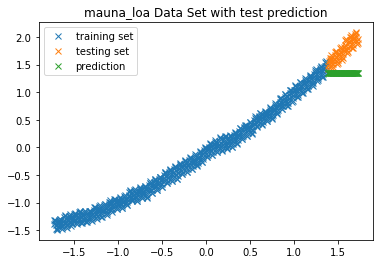

In [51]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_test,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with test prediction')

